In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
from keras.layers import Dense, Flatten
from keras.models import Model

In [86]:
from IPython.display import Image
import os


In [87]:
import random

# Set the random seed
random.seed(42)
np.random.seed(42)




In [88]:
data = "/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/TB_Chest_Radiography_Database"

In [89]:
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (180, 180),
    batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (180, 180),
    batch_size = batch_size)



Found 4200 files belonging to 2 classes.
Using 3360 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.


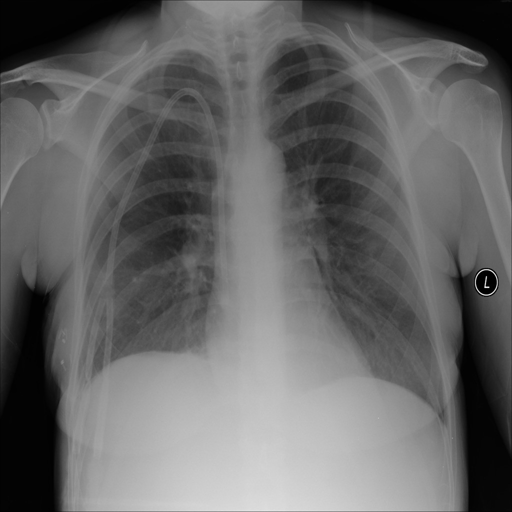

In [90]:
Image("/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/TB_Chest_Radiography_Database/Normal/Normal-1.png", height = 300)

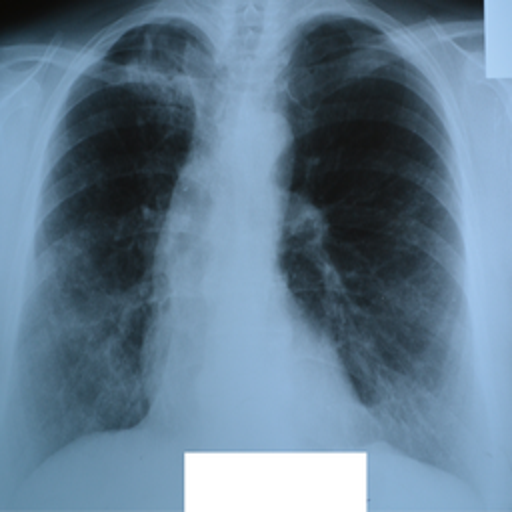

In [91]:
Image("/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-1.png", height = 300)

In [92]:
def create_model():
    model = keras.applications.vgg19.VGG19(input_shape = (180, 180, 3), include_top = False)

    for layer in model.layers:
        layer.trainable = False


    X = Flatten()(model.output)
    X = Dense(units = 28, activation = "softmax")(X)
    model = Model(model.input, X)

    model.compile(optimizer = "adam", loss = keras.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])



    return model

In [93]:
model = create_model()
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0  

In [94]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = "/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/best_model.h5")

In [131]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model():
    model = create_model()
    model.fit(train_ds, steps_per_epoch = len(train_ds), epochs = 15, verbose = 1, callbacks = [early_stopping, model_checkpoint], validation_data = val_ds, validation_steps = len(val_ds))
    return model


In [132]:
model = train_model()

Epoch 1/15
105/105 [==============================] - 38s 297ms/step - loss: 0.8062 - accuracy: 0.9461 - val_loss: 0.2674 - val_accuracy: 0.9786
Epoch 2/15
105/105 [==============================] - 36s 322ms/step - loss: 0.0732 - accuracy: 0.9943 - val_loss: 0.0782 - val_accuracy: 0.9905
Epoch 3/15
105/105 [==============================] - 40s 353ms/step - loss: 0.0243 - accuracy: 0.9967 - val_loss: 0.1997 - val_accuracy: 0.9869
Epoch 4/15
105/105 [==============================] - 35s 312ms/step - loss: 0.0189 - accuracy: 0.9985 - val_loss: 0.2461 - val_accuracy: 0.9798
Epoch 5/15
105/105 [==============================] - 38s 348ms/step - loss: 0.0348 - accuracy: 0.9964 - val_loss: 0.0895 - val_accuracy: 0.9940
Epoch 6/15
105/105 [==============================] - 34s 306ms/step - loss: 0.0323 - accuracy: 0.9967 - val_loss: 0.0658 - val_accuracy: 0.9952
Epoch 7/15
105/105 [==============================] - 33s 301ms/step - loss: 0.0544 - accuracy: 0.9961 - val_loss: 0.1044 - val_ac

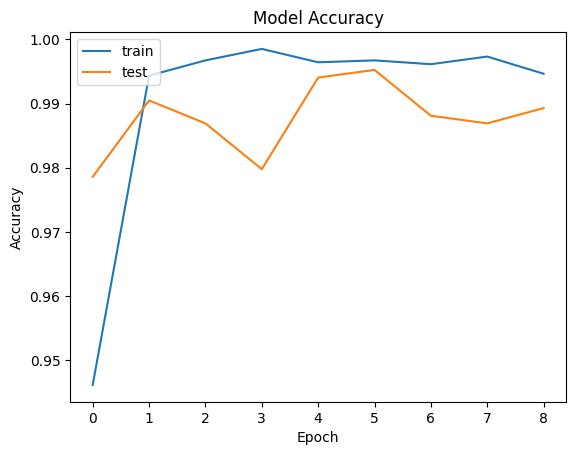

In [133]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

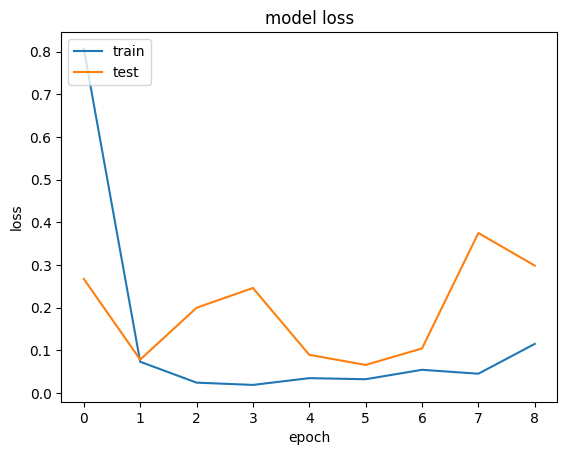

In [134]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [135]:
accuracy = model.evaluate(val_ds)[1]

print(f"The accuracy of model is {accuracy * 100:.2f}%")

27/27 [==============================] - 11s 230ms/step - loss: 0.2986 - accuracy: 0.9893
The accuracy of model is 98.93%


In [103]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

# for layer in base_model.layers[30:]:
#   layer.trainable = False
    

model1 = Flatten()(base_model.output)
model1 = Dense(units=256, activation="relu")(model1)
model1 = Dense(units=64, activation="relu")(model1)
prediction_layer1 = Dense(units=1, activation="sigmoid")(model1)

model1 = Model(inputs = base_model.input, outputs = prediction_layer1)
model1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])



In [104]:
model1 = create_model()
model1.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0  

In [106]:
early_stopping1 = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 3)
model_checkpoint1 = tf.keras.callbacks.ModelCheckpoint(filepath = "/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/best_model2.h5")

In [107]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model():
    model1=create_model()
    model1.fit(train_ds, steps_per_epoch = len(train_ds), epochs = 15, verbose = 1,callbacks = [early_stopping1, model_checkpoint1], validation_data = val_ds, validation_steps = len(val_ds))
    return model1

In [109]:
model1 = train_model()

Epoch 1/15
105/105 [==============================] - 36s 312ms/step - loss: 0.5451 - accuracy: 0.9560 - val_loss: 0.2232 - val_accuracy: 0.9810
Epoch 2/15
105/105 [==============================] - 33s 301ms/step - loss: 0.0604 - accuracy: 0.9937 - val_loss: 0.1305 - val_accuracy: 0.9869
Epoch 3/15
105/105 [==============================] - 33s 301ms/step - loss: 0.0290 - accuracy: 0.9961 - val_loss: 0.1445 - val_accuracy: 0.9893
Epoch 4/15
105/105 [==============================] - 33s 299ms/step - loss: 0.0087 - accuracy: 0.9991 - val_loss: 0.2023 - val_accuracy: 0.9845
Epoch 5/15
105/105 [==============================] - 34s 307ms/step - loss: 0.0736 - accuracy: 0.9949 - val_loss: 0.3468 - val_accuracy: 0.9833
Epoch 6/15
105/105 [==============================] - 33s 302ms/step - loss: 4.7206e-04 - accuracy: 0.9997 - val_loss: 0.1611 - val_accuracy: 0.9893


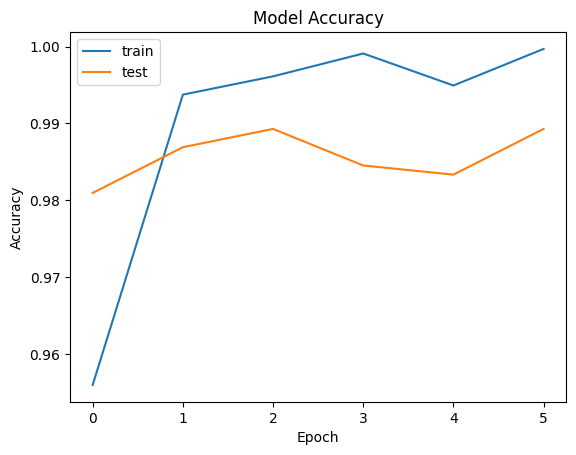

In [110]:
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

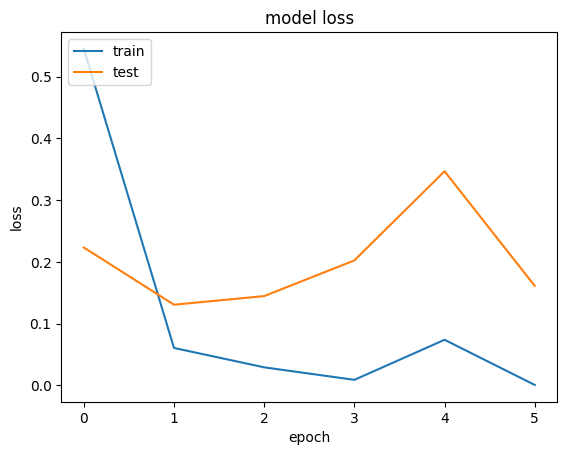

In [111]:
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [113]:
accuracy1 = model1.evaluate(val_ds)[1]

print(f"The accuracy of model is {accuracy1 * 100:.2f}%")

27/27 [==============================] - 7s 173ms/step - loss: 0.1611 - accuracy: 0.9893
The accuracy of model is 98.93%


In [114]:
base_model1 = tf.keras.applications.ResNet50(input_shape=[224, 224, 3], weights='imagenet', include_top=False)
model2 = Flatten()(base_model1.output)
model2 = Dense(units=256, activation="relu")(model2)
model2 = Dense(units=64, activation="relu")(model2)
prediction_layer2 = Dense(units=1, activation="sigmoid")(model2)

model2 = Model(inputs=base_model1.input, outputs=prediction_layer2)

model2.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])



94765736/94765736 [==============================] - 4s 0us/step


In [115]:
model2 = create_model()
model2.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0  

In [117]:
early_stopping2= tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 3)
model_checkpoint2 = tf.keras.callbacks.ModelCheckpoint(filepath = "/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/best_model3.h5")

In [118]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model():
    model2=create_model()
    model2.fit(train_ds, steps_per_epoch = len(train_ds), epochs = 15, verbose = 1,callbacks = [early_stopping2, model_checkpoint2], validation_data = val_ds, validation_steps = len(val_ds))
    return model2

In [119]:
model2 = train_model()

Epoch 1/15
105/105 [==============================] - 35s 300ms/step - loss: 0.6519 - accuracy: 0.9554 - val_loss: 0.2791 - val_accuracy: 0.9726
Epoch 2/15
105/105 [==============================] - 36s 322ms/step - loss: 0.1476 - accuracy: 0.9905 - val_loss: 0.2079 - val_accuracy: 0.9821
Epoch 3/15
105/105 [==============================] - 38s 345ms/step - loss: 0.0176 - accuracy: 0.9964 - val_loss: 0.2848 - val_accuracy: 0.9774
Epoch 4/15
105/105 [==============================] - 33s 304ms/step - loss: 0.0262 - accuracy: 0.9964 - val_loss: 0.3063 - val_accuracy: 0.9833
Epoch 5/15
105/105 [==============================] - 34s 305ms/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.3623 - val_accuracy: 0.9798
Epoch 6/15
105/105 [==============================] - 34s 305ms/step - loss: 0.0332 - accuracy: 0.9961 - val_loss: 0.3060 - val_accuracy: 0.9810
Epoch 7/15
105/105 [==============================] - 33s 300ms/step - loss: 0.0158 - accuracy: 0.9982 - val_loss: 0.2281 - val_ac

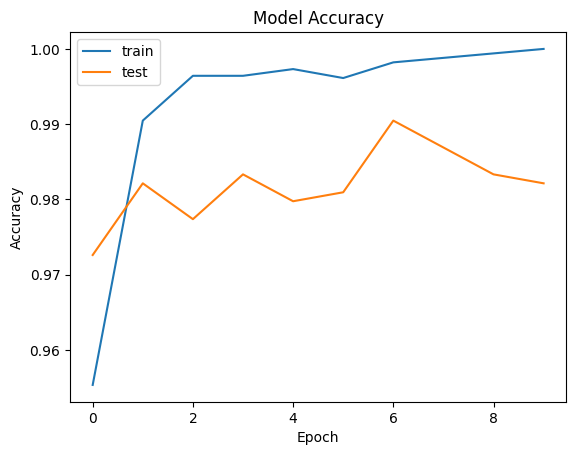

In [120]:
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

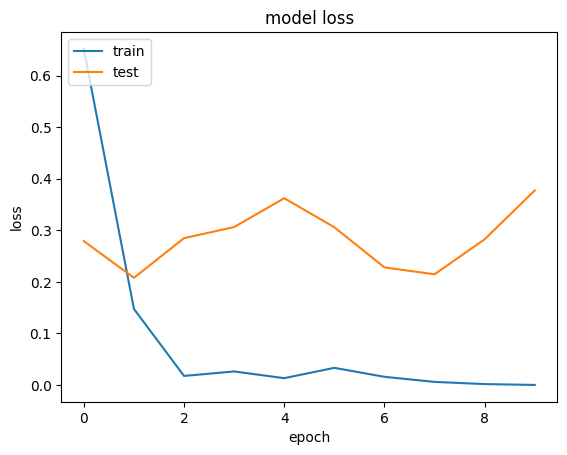

In [121]:
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [122]:
accuracy2 = model2.evaluate(val_ds)[1]

print(f"The accuracy of model is {accuracy2 * 100:.2f}%")

27/27 [==============================] - 7s 184ms/step - loss: 0.3773 - accuracy: 0.9821
The accuracy of model is 98.21%


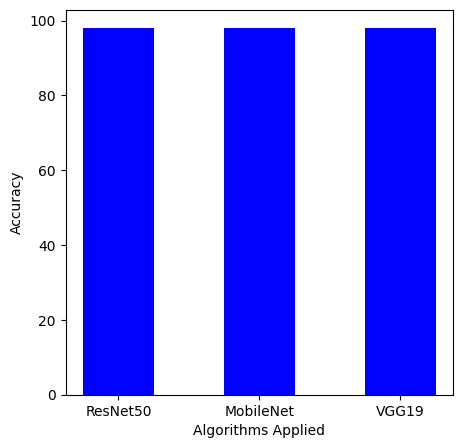

In [136]:
algos = ['ResNet50','MobileNet','VGG19']
accuracy = [accuracy, accuracy1,accuracy2]
accuracy = np.floor([i * 100 for i in accuracy])
  
fig = plt.figure(figsize = (5, 5))
#fig.set_figwidth(4)
 
# creating the bar plot
plt.bar(algos, accuracy, color ='blue', width = 0.5)
 
plt.xlabel("Algorithms Applied")
plt.ylabel("Accuracy")
plt.show()

In [124]:
labels = train_ds.class_names
labels

['Normal', 'Tuberculosis']

In [125]:
from tensorflow.keras.models import load_model
Mobilenet=load_model("/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/best_model2.h5")

In [126]:
def result(file_path):
    image = tf.keras.preprocessing.image.load_img(file_path, target_size = (180, 180))
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    input = tf.keras.applications.resnet50.preprocess_input(img_array)
    img = np.expand_dims(input, axis = 0)
    preds = np.argmax(Mobilenet.predict(img))

    print(f"Patient Status: {labels[preds]}")

    if labels[preds] == "Tuberculosis":
        print("Patient has been diagnosed with Tuberculosis")

    else:
        print("Patient has not been diagnosed with Tuberculosis")

In [127]:
path = "/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-106.png"
result(path)

1/1 [==============================] - 1s 834ms/step
Patient Status: Tuberculosis
Patient has been diagnosed with Tuberculosis


In [129]:
path = "/content/drive/MyDrive/tuber-20230505T091641Z-001/tuber/archive (6)/TB_Chest_Radiography_Database/Normal/Normal-1007.png"

result(path)

1/1 [==============================] - 0s 19ms/step
Patient Status: Normal
Patient has not been diagnosed with Tuberculosis
